# Implementing the endpoint model for laser-range measurements
- NAME: `Abdelaziz Salah`
- BN: '3'
- SEC: '2'
* We need to compute the likelihood of the generated laser scan for a 3D-grid of poses (x,y,0)
* for each 2D cell of the xy grid of the map, visualize the highest likelihood of all orientation 0 as grey value.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def convertImgToBinary(img, threshold):
    '''
        INPUT:
            img: a 2D numpy array, representing an image
            threshold: a float, representing the threshold value
        OUTPUT:
            a 2D numpy array, representing the binary image
        DESCRIPTION:
            for a given image, if the pixel has an intensity larger than the given threshold, we should assign its value to 1, otherwise, 0
    '''
    img = img > threshold
    return img.astype(np.uint8)

In [3]:
def InvertColors(img):
    '''
        INPUT:
            img: a 2D numpy array, representing an image
        OUTPUT:
            a 2D numpy array, representing the inverted image
        DESCRIPTION:
            given the map with white background, convert it to black background
    '''
    inv_img = [[1 if pixel == 0 else 0 for pixel in row] for row in img]
    return np.array(inv_img, dtype=np.uint8)

In [4]:
# Read the map and apply preprocessing
map = cv2.imread('Map.jpg', cv2.IMREAD_GRAYSCALE)
binaryMap = convertImgToBinary(map, threshold=0.8)
invertedMap = InvertColors(binaryMap)
rows, cols = invertedMap.shape
print (rows, cols)

400 680


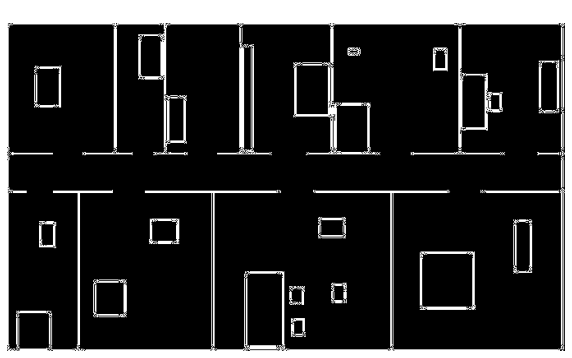

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(invertedMap, cmap='gray')
plt.axis('off')  # Hide axis values
# change the title color to white
plt.title('Inverted Map', color='white')

plt.show()

In [6]:
# Function to compute the likelihood value given distance and variance
import math
def gaussianLikelihood(distance, variance):
    '''
        INPUT:
            distance: a float, representing the distance between the robot and the landmark
            variance: a float, representing the variance of the sensor
        OUTPUT:
            a float, representing the likelihood value
        DESCRIPTION:
            given the distance and variance, compute the likelihood value
    
    '''
    coff = 1 / (math.sqrt(2 * math.pi * variance)) # 1 / (sqrt(2 * pi * sigma^2))
    expPart = math.exp(-0.5 * ((distance**2 / variance) )) # e^(-0.5 * (d^2 / sigma^2))
    gaussian = coff * expPart
    return gaussian

In [7]:
def minDistFromObst(x,y,obstacles):
    '''
        INPUT:
            x: a float, representing the x coordinate of the robot
            y: a float, representing the y coordinate of the robot
            obstacles: a 2D numpy array, representing the obstacles locations
        OUTPUT:
            a float, representing the minimum distance between the robot and all existing obstacles
        DESCRIPTION:
            given the robot coordinates, compute the minimum distance between the robot and the obstacles
    '''
    # Compute all distances
    distances = np.sqrt((obstacles[:, 0] - x) ** 2 + (obstacles[:, 1] - y) ** 2)
    
    # Find the minimum distance
    min_distance = np.min(distances)
    
    return (min_distance)

In [8]:
def showImage(image, save=False, name='Map'):
    plt.imshow(image, cmap='gray')
    if save:
        plt.savefig(f'{name}.png')
    plt.show()

In [9]:
#? Get all obstacles locations in matrix
obstacles = np.argwhere(invertedMap == 1)

# Get the min distances and save it
minDistances = np.zeros((rows, cols), dtype=float)
for i in range(0, rows):
    for j in range(0, cols):
        minDistances[i,j] = minDistFromObst(i, j, obstacles)


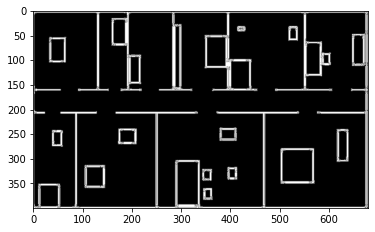

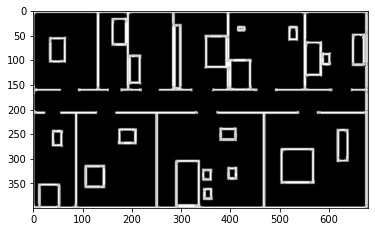

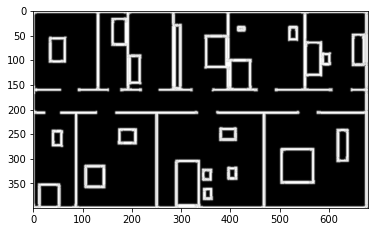

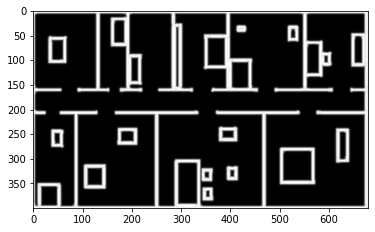

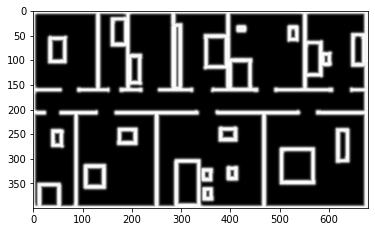

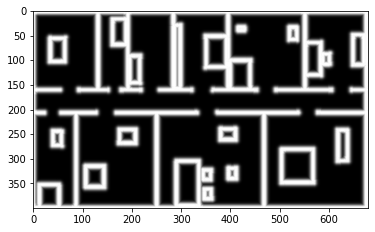

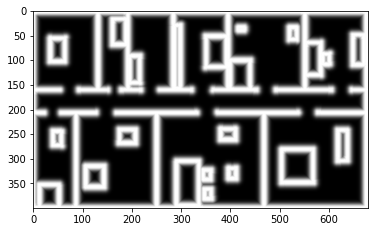

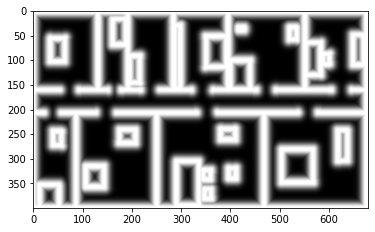

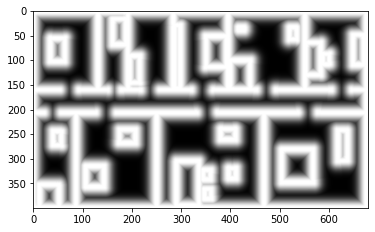

In [10]:
# Get the liklihood values for different variances
variance = 0.5
maxLikelihoods = np.zeros((rows, cols), dtype=float)
while variance < 129:
    for i in range(0, rows):
        for j in range(0, cols):
            maxLikelihoods[i,j] = gaussianLikelihood(minDistances[i,j], variance)
    showImage(maxLikelihoods, True, "variance_"+str(variance))
    variance *= 2